<a href="https://colab.research.google.com/github/huxe/Machine-learning/blob/master/MLPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sn
import time
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
col_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
# load dataset
values = pd.read_csv("heart.csv", names=col_names)

In [0]:
X = values.drop('target', axis=1)
Y = values['target']

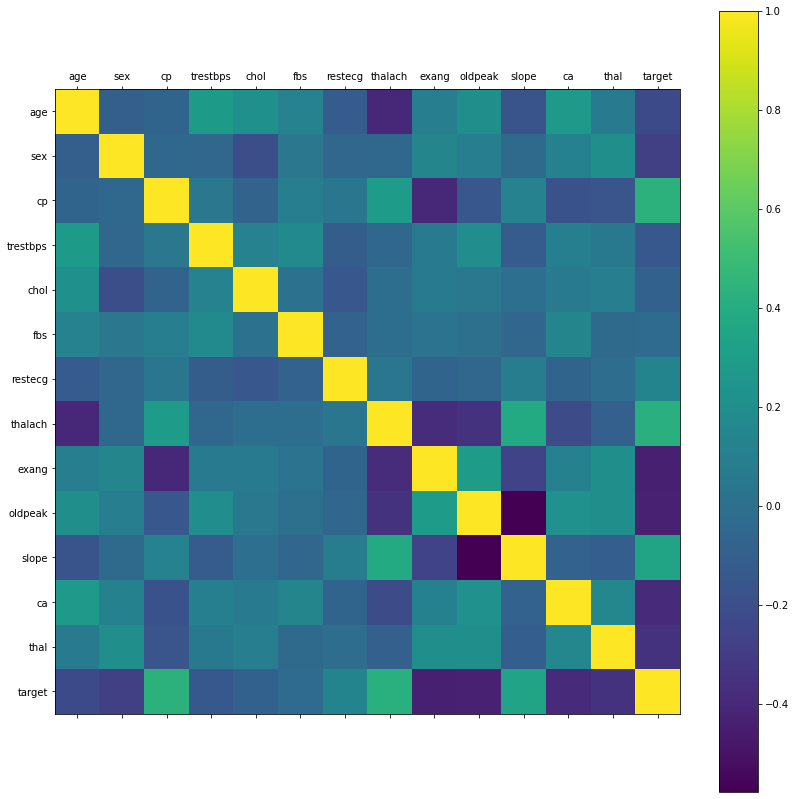

In [7]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(values.corr())
plt.yticks(np.arange(values.shape[1]), values.columns)
plt.xticks(np.arange(values.shape[1]), values.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f822d611a58>,
      dtype=object)

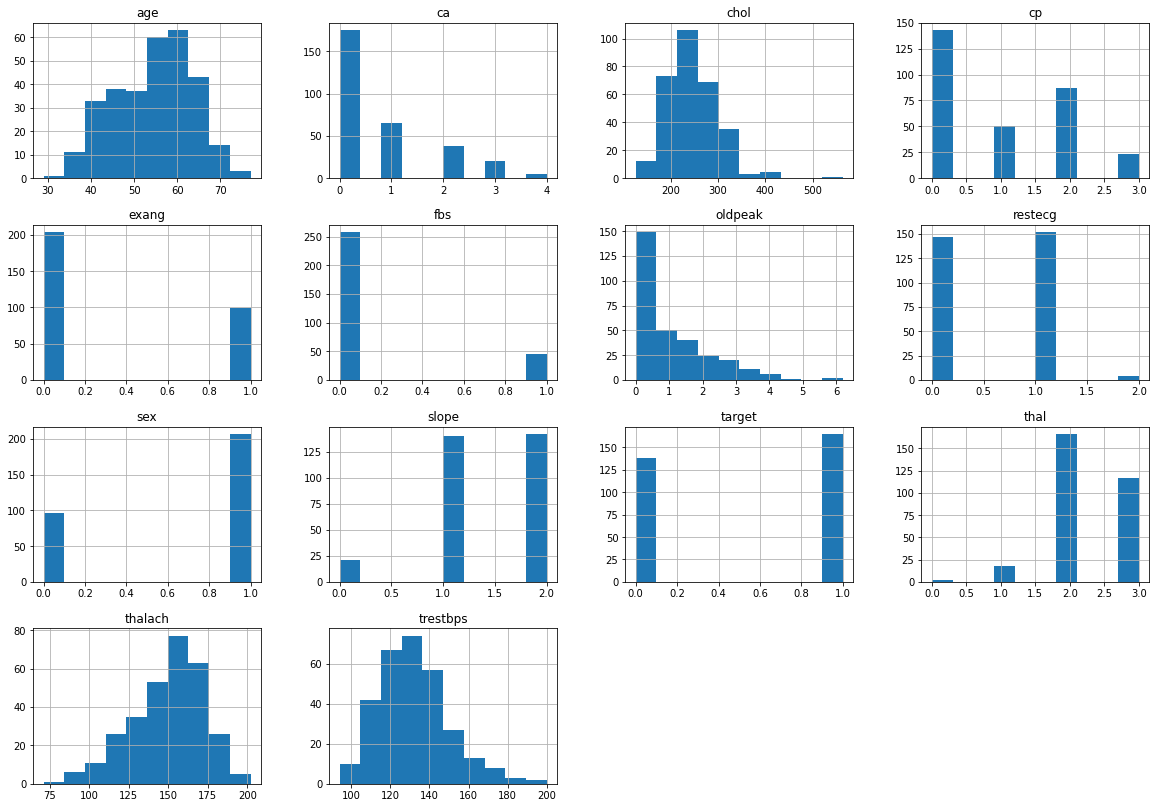

In [8]:
values.hist()

Text(0.5, 1.0, 'Count of each Target Class')

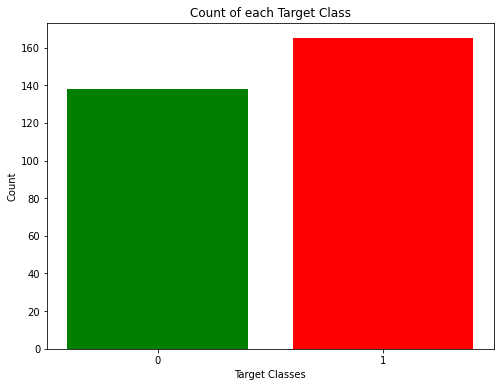

In [9]:
rcParams['figure.figsize'] = 8,6
plt.bar(values['target'].unique(), values['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [0]:
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size=0.3) 

In [0]:
ModelName=[]
TestAccuracy=[]
TrainAccuracy=[]
PredictedResult=[]
ConfusionMatrix=[]
Probes=[]

In [0]:
def Train(name,model):
    ModelName.append(name)
    model.fit(train_x, train_y)
    y_predicted = model.predict(test_x)
    PredictedResult.append(list(y_predicted))
    train_Acc = model.score(train_x, train_y)
    print('train accuracy for ',name,'=',train_Acc)
    TrainAccuracy.append(train_Acc)
    test_Acc = accuracy_score(test_y, y_predicted)
    TestAccuracy.append(test_Acc)
    print('test accuracy for ',name,'=',test_Acc)
    print('\n')
    ConfusionMatrix.append(confusion_matrix(test_y,y_predicted))
    Probes.append(model.predict_proba(test_x))

In [13]:
from keras.models import Sequential
from keras.layers.core import Dense,Activation
def NN(name):
  ModelName.append(name)
  model = Sequential()
  model.add(Dense(20, input_dim=13, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(13, activation='relu'))
  model.add(Dense(5, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  history=model.fit(train_x, train_y, epochs=200, batch_size=10,verbose=0)
  train_Acc=max(history.history['accuracy'])
  pred1=model.predict(test_x)
  pred=sum(np.where(pred1 > 0.5, 1, 0).tolist(),[])
  PredictedResult.append(pred)
  test_Acc = accuracy_score(test_y, pred)
  TestAccuracy.append(test_Acc)
  print('train accuracy for ',name,'=',train_Acc)
  TrainAccuracy.append(train_Acc)
  print('test accuracy for ',name,'=',test_Acc)
  print('\n')
  ConfusionMatrix.append(confusion_matrix(test_y, pred))
  Probes.append(model.predict_proba(test_x,verbose=1))

Using TensorFlow backend.


In [0]:
models=[LogisticRegression(),GaussianNB(),KNeighborsClassifier(n_neighbors=5),svm.SVC(kernel='linear', probability=True),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100)]
names=['logitic','Knife Bias','KNN','SVM','Decision Tree','Random Forest']

In [15]:
t1 = time.perf_counter()
for i in range(len(names)):
    Train(names[i],models[i])
NN('Neural network')
t2 = time.perf_counter()
print('\n')
print(f'Finished in {t2-t1} seconds')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


train accuracy for  logitic = 0.8820754716981132
test accuracy for  logitic = 0.7582417582417582


train accuracy for  Knife Bias = 0.8820754716981132
test accuracy for  Knife Bias = 0.7692307692307693


train accuracy for  KNN = 0.7783018867924528
test accuracy for  KNN = 0.5054945054945055


train accuracy for  SVM = 0.8867924528301887
test accuracy for  SVM = 0.7472527472527473


train accuracy for  Decision Tree = 1.0
test accuracy for  Decision Tree = 0.7252747252747253


train accuracy for  Random Forest = 1.0
test accuracy for  Random Forest = 0.7692307692307693


train accuracy for  Neural network = 0.9056604
test accuracy for  Neural network = 0.7582417582417582


91/91 [==============================] - 0s 25us/step


Finished in 7.424232858999858 seconds


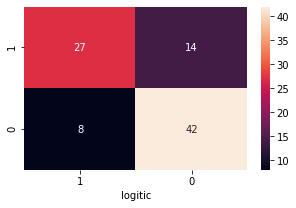

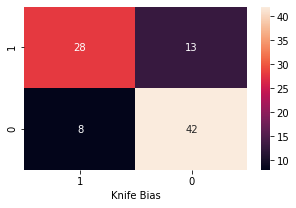

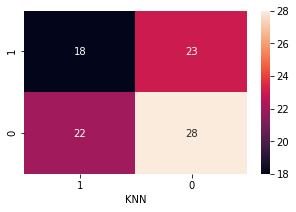

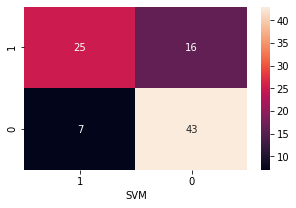

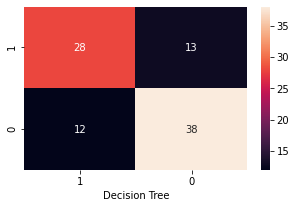

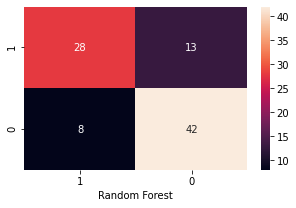

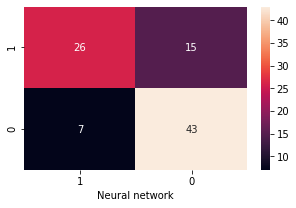

In [16]:
for i in range(len(ModelName)):
  df_cm = pd.DataFrame(ConfusionMatrix[i], index = ['1','0'],columns = ['1','0'])
  plt.figure(figsize = (5,3))
  sn.heatmap(df_cm, annot=True)
  plt.xlabel(ModelName[i])

In [0]:
Sensitivity=[]
Specificity=[]
Precision=[]

for i in range(len(ModelName)):
  TP=ConfusionMatrix[i][0][0]
  TN=ConfusionMatrix[i][0][1]
  FP=ConfusionMatrix[i][1][1]
  FN=ConfusionMatrix[i][1][0]
  # Sensitivity, hit rate, recall, or true positive rate
  TPR = TP/(TP+FN)
  Sensitivity.append(TPR)
  # Specificity or true negative rate
  TNR = TN/(TN+FP) 
  Specificity.append(TNR)
  # Precision or positive predictive value
  PPV = TP/(TP+FP)
  Precision.append(PPV)

Text(0, 0.5, 'Sensitivity Vlaues')

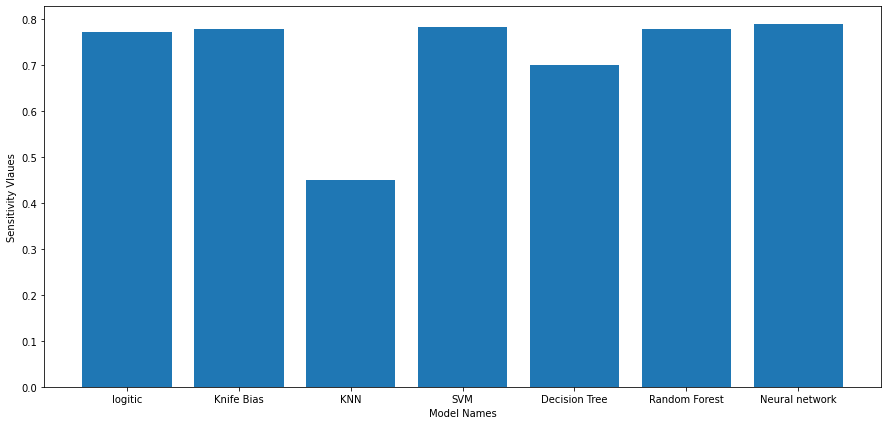

In [18]:
rcParams['figure.figsize'] = 15,7
plt.bar(ModelName,Sensitivity)
plt.xticks(ModelName)
plt.xlabel('Model Names')
plt.ylabel('Sensitivity Vlaues')


Text(0, 0.5, 'Specificity Vlaues')

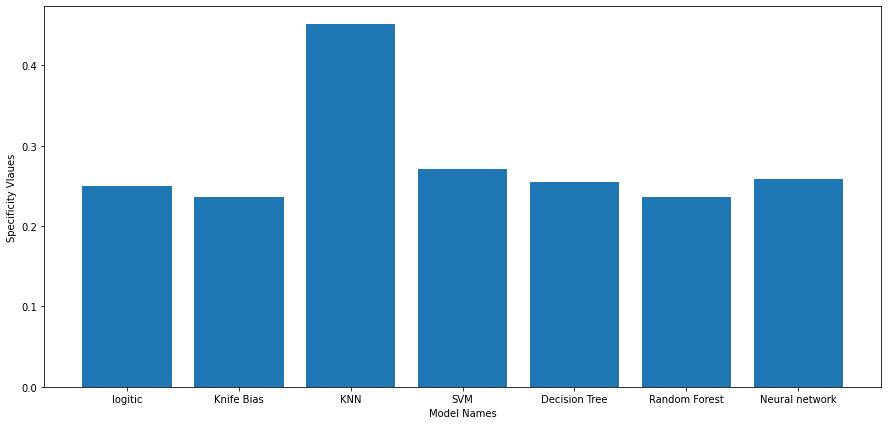

In [19]:
rcParams['figure.figsize'] = 15,7
plt.bar(ModelName,Specificity)
plt.xticks(ModelName)
plt.xlabel('Model Names')
plt.ylabel('Specificity Vlaues')

Text(0, 0.5, 'Precision Vlaues')

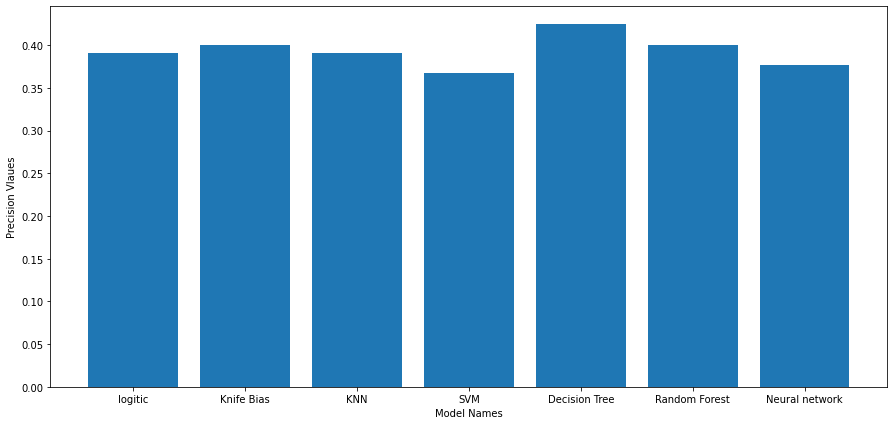

In [20]:
rcParams['figure.figsize'] = 15,7
plt.bar(ModelName,Precision)
plt.xticks(ModelName)
plt.xlabel('Model Names')
plt.ylabel('Precision Vlaues')

Text(0, 0.5, 'Train Accuracy Vlaues')

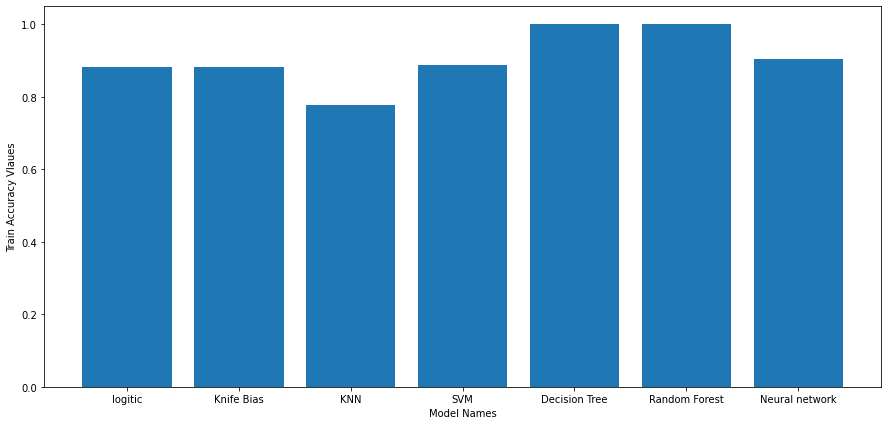

In [21]:
rcParams['figure.figsize'] = 15,7
plt.bar(ModelName,TrainAccuracy)
plt.xticks(ModelName)
plt.xlabel('Model Names')
plt.ylabel('Train Accuracy Vlaues')

Text(0, 0.5, 'Test Accuracy Vlaues')

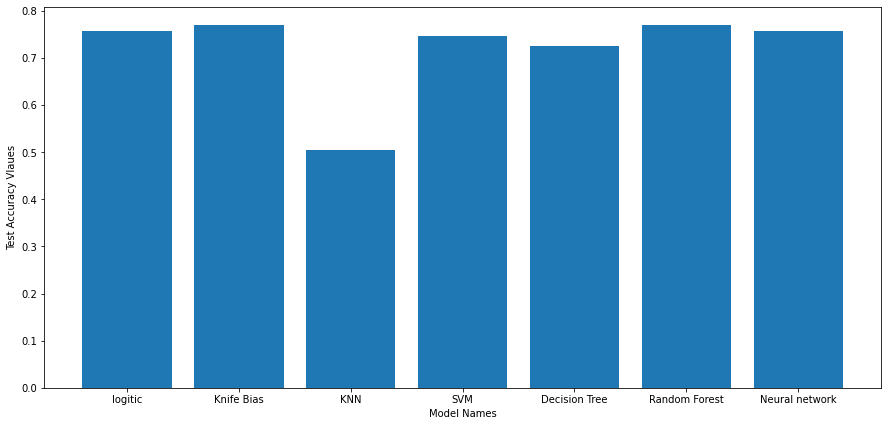

In [22]:
rcParams['figure.figsize'] = 15,7
plt.bar(ModelName,TestAccuracy)
plt.xticks(ModelName)
plt.xlabel('Model Names')
plt.ylabel('Test Accuracy Vlaues')

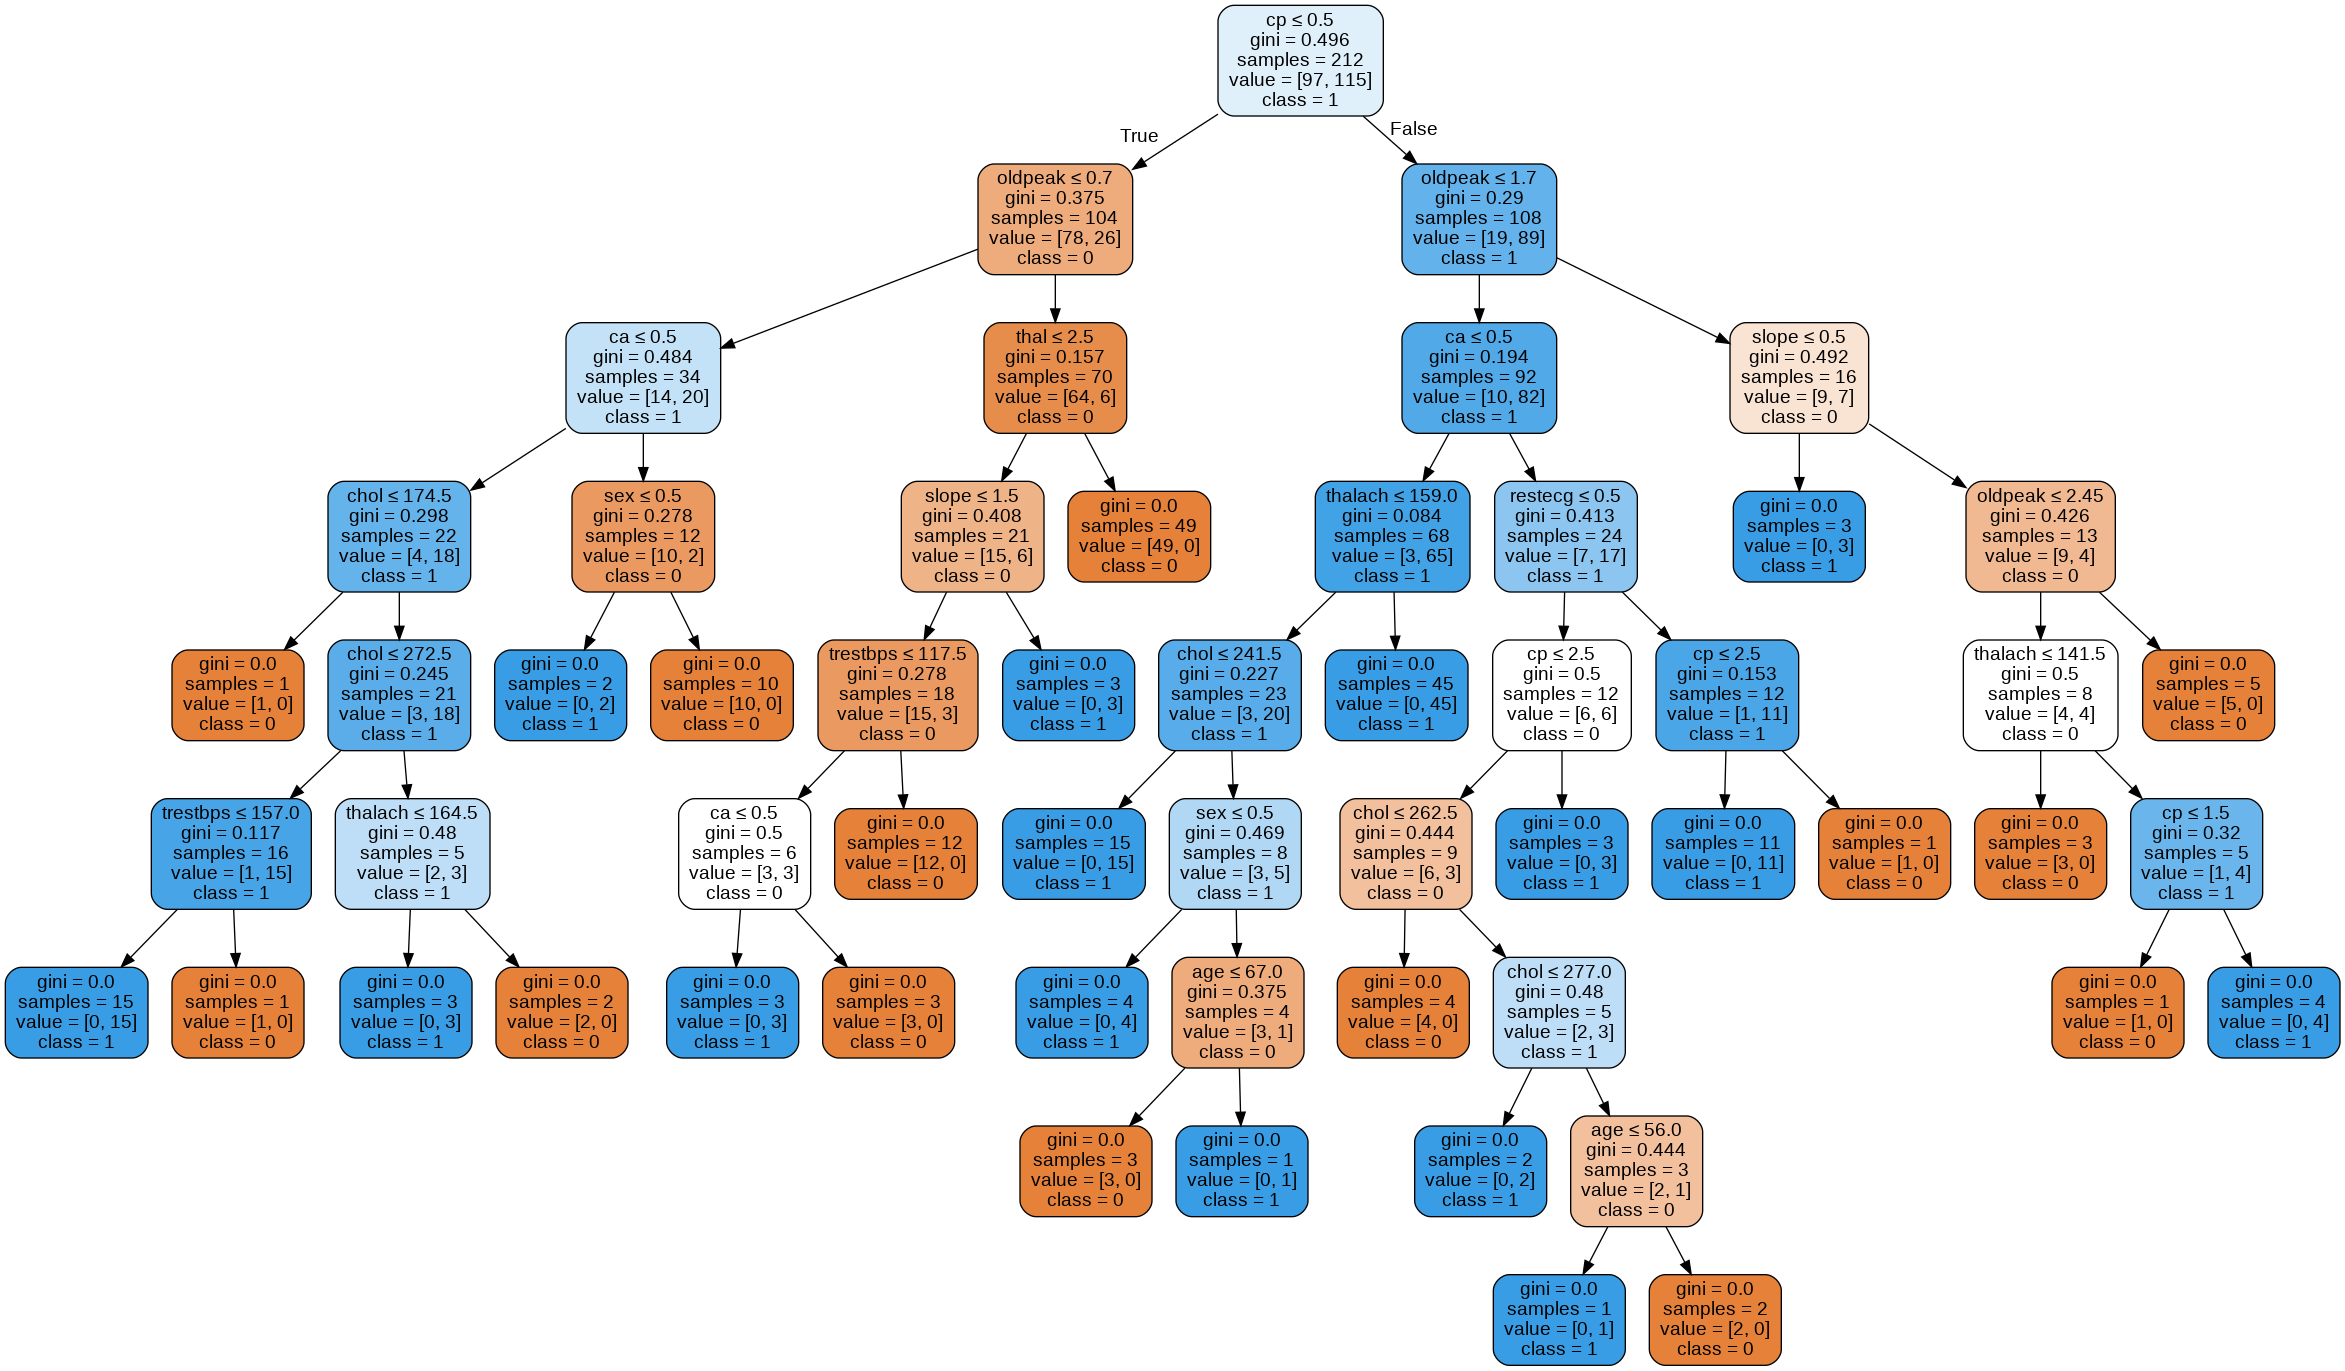

In [27]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(models[4], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names[:-1],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

logitic : ROC AUC=0.749


Knife Bias : ROC AUC=0.761


KNN : ROC AUC=0.500


SVM : ROC AUC=0.735


Decision Tree : ROC AUC=0.721


Random Forest : ROC AUC=0.761


Neural network : ROC AUC=0.747




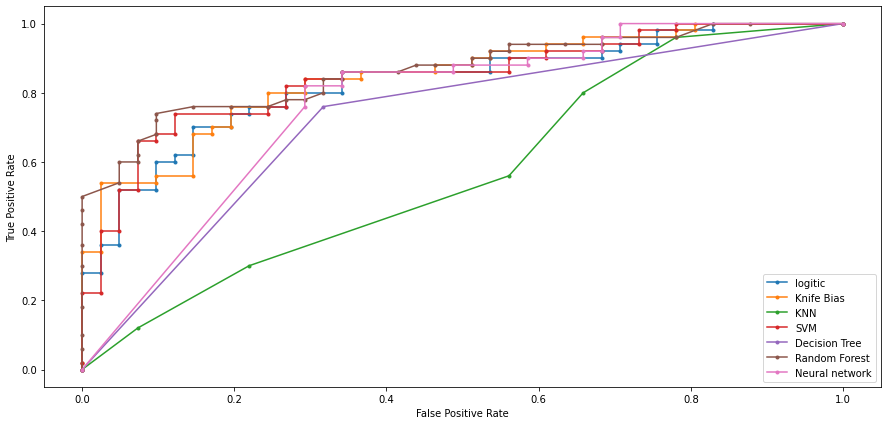

In [31]:
AUC=[]
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
for i in range(len(ModelName)):
  if i==len(ModelName)-1:
    lr_probs = Probes[i][:, 0]
  else:
    lr_probs = Probes[i][:, 1]
  lr_auc = roc_auc_score(test_y, PredictedResult[i])
  print(ModelName[i],': ROC AUC=%.3f' % (lr_auc))
  AUC.append(lr_auc)
  print('\n')
  lr_fpr, lr_tpr, _ = roc_curve(test_y, lr_probs)
  plt.plot(lr_fpr, lr_tpr, marker='.', label=ModelName[i])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [32]:
import pandas as pd
data = {'Senstivity':Sensitivity,'Specificty':Specificity,'Precision':Precision,'Train Accuracy':TrainAccuracy,'Test Accuracy':TestAccuracy,'AUC':AUC}
df = pd.DataFrame(data, index=ModelName)
df

,Senstivity,Specificty,Precision,Train Accuracy,Test Accuracy,AUC
logitic,0.771429,0.250000,0.391304,0.882075,0.758242,0.749268
Knife Bias,0.777778,0.236364,0.400000,0.882075,0.769231,0.761463
KNN,0.450000,0.450980,0.391304,0.778302,0.505495,0.499512
SVM,0.781250,0.271186,0.367647,0.886792,0.747253,0.734878
Decision Tree,0.700000,0.254902,0.424242,1.000000,0.725275,0.721463
Random Forest,0.777778,0.236364,0.400000,1.000000,0.769231,0.761463
Neural network,0.787879,0.258621,0.376812,0.905660,0.758242,0.747073
